In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.shape

(1061, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [7]:
# What is the range of selling prices in the dataset?
# from the df.describe we can see that the maximum selling is 760000 and the minimum selling price is 5000.
# So the range of selling price is from 5000 - 760000

In [8]:
# What is the median selling price for bikes in the dataset?
np.median(df["selling_price"])

45000.0

In [9]:
# What is the most common seller type?
df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [10]:
# the most common seller type is Individual

In [11]:
# How many bikes have driven more than 50,000 kilometers?
df[df["km_driven"]>50000].shape[0]

170

In [12]:
# 170 bikes have driven more than 50000 kilometers

In [13]:
# What is the average km_driven value for each ownership type?
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [14]:
# average kilometer driven is 34359.833176 kms

In [15]:
# What proportion of bikes are from the year 2015 or older?
df[df['year'] > 2015].shape[0]

460

In [16]:
# 460 bikes are from year 2015 or older

In [17]:
# What is the trend of missing values across the dataset?
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [18]:
# there are 435 null values in the ex_showroom_price column

In [19]:
# What is the highest ex_showroom_price recorded, and for which bike?
df[df["ex_showroom_price"] == df["ex_showroom_price"].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [20]:
# 1278000.0 is the highest ex_showroom_price for Harley-Davidson Street Bob	

In [21]:
# What is the total number of bikes listed by each seller type?
df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

<Axes: xlabel='km_driven', ylabel='selling_price'>

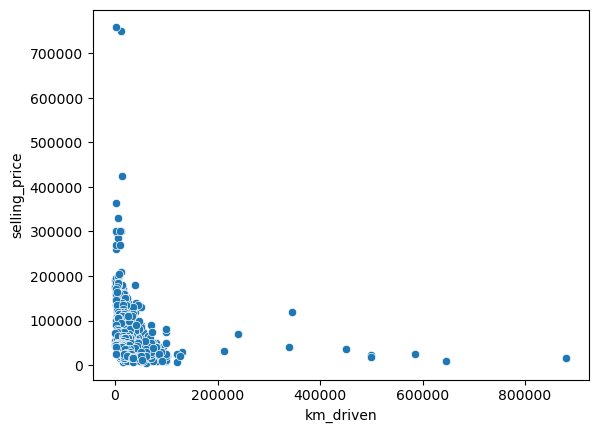

In [22]:
# What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(x = "km_driven", y = "selling_price",data = df)

In [23]:
# Interpretation >> As the km_driven increases the selling price decreases

In [24]:
# Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5*IQR
upper_fence = Q3+1.5*IQR

In [25]:
df = df[(df.km_driven >= lower_fence) & (df.km_driven <= upper_fence)]

In [26]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


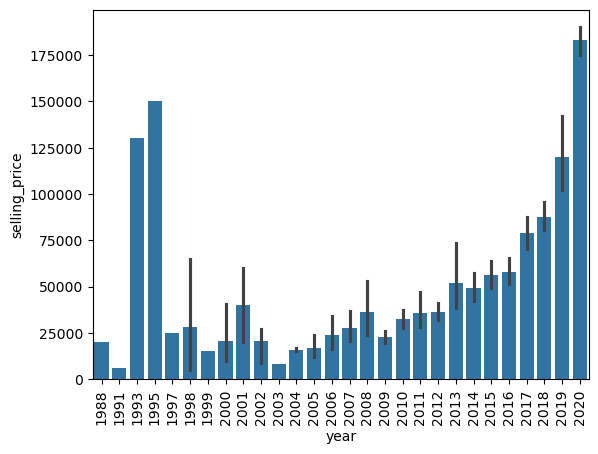

In [27]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price?
sns.barplot(x = 'year', y = 'selling_price',data = df)
plt.xticks(rotation=90)
plt.show()

In [28]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
# first we need to deal with the missing values in ex_showroom_price column
# we will calcualte the depriciation of the rows where there is no null values and other values will be null in depriciation columns
# fill the missing values of depriciation with mean

In [29]:
for i in df['ex_showroom_price']:
    if i == 'nan':
        df['depriciation'] = 'nan'
    else :
        df['depriciation'] = df['ex_showroom_price'] - df['selling_price']

In [30]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depriciation
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,-1886.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,24643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,NaN
...,...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0,58700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0,14000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,35000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,42000.0


In [31]:
df['depriciation'] = df['depriciation'].fillna(df['depriciation'].mean())

In [32]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    415
depriciation           0
dtype: int64

In [33]:
df.groupby('year')['depriciation'].mean()

year
1988    28357.655684
1991    28357.655684
1993    28357.655684
1995    28357.655684
1997    28357.655684
1998    28357.655684
1999    28357.655684
2000    28357.655684
2001    31604.827842
2002    28357.655684
2003    28357.655684
2004    31189.103789
2005    29535.823135
2006    30738.043961
2007    32187.113225
2008    34276.898320
2009    34594.776878
2010    36427.666349
2011    39061.707720
2012    32608.620938
2013    38910.555746
2014    32622.038113
2015    28323.051653
2016    28666.518690
2017    24507.382370
2018    19344.270282
2019    14179.185070
2020     7485.103789
Name: depriciation, dtype: float64

In [34]:
# Which bike names are priced significantly above the average price for their manufacturing year?
x = df.groupby('year')['selling_price'].mean()

In [35]:
x

year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     25000.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     16000.000000
2005     16978.571429
2006     23821.052632
2007     27768.181818
2008     36404.000000
2009     22934.782609
2010     32350.877193
2011     35931.017241
2012     36157.560606
2013     51802.816901
2014     49121.348315
2015     56313.131313
2016     57924.126214
2017     78962.121212
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64

In [36]:
corr = df.corr